# **Task 1: Housing Prices**

**Activity 1: Uploading of the Data Set and data checking**

Note to Reviewer: File "housing_prices.xlsx" was uploaded to this Jupiter Notebook using Google Colab, uploaded from my Downloads Folder.

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for filename in uploaded.keys():
  # Load housing data into a dedicated DataFrame
  if 'housing_prices' in filename:
    housing_df = pd.read_excel(filename)
    print(f"DataFrame from {filename}:")
    print(housing_df.head())
  else: # Handle other uploads if necessary, though the focus is housing data here
    print(f"Skipping loading of {filename} into housing_df.")

# Note: The 'df' variable might still hold the last uploaded file if not housing data.
# For Task 1 operations, use housing_df.

Saving housing_prices.xlsx to housing_prices.xlsx
DataFrame from housing_prices.xlsx:
   Square_Feet  Num_Bedrooms  Num_Bathrooms  Age_of_House   House_Price
0         1660             1              2            38  7.698993e+05
1         4572             3              2            14  1.598878e+06
2         3892             4              3            28  1.326075e+06
3         1266             2              1            28  2.356498e+05
4         4244             4              2            10  1.428993e+06


In [ ]:
#To check the high-level completeness of data and types

print(housing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Square_Feet    500 non-null    int64  
 1   Num_Bedrooms   500 non-null    int64  
 2   Num_Bathrooms  500 non-null    int64  
 3   Age_of_House   500 non-null    int64  
 4   House_Price    500 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 19.7 KB
None


In [ ]:
#To check weather the ending information matches total lines, and also possible errors

print(housing_df.tail())

     Square_Feet  Num_Bedrooms  Num_Bathrooms  Age_of_House   House_Price
495         4384             3              1            21  1.791427e+06
496         2196             1              1            18  1.124440e+06
497         4437             4              3            33  1.671769e+06
498         4130             2              1            13  1.592698e+06
499         3503             3              1             3  1.262578e+06


In [ ]:
print(housing_df.shape)

(500, 5)


**Activity 2. Regression Analysis for all coefficient vs House Prices**

In [ ]:
import statsmodels.api as sm

# Define the dependent variable (y) and independent variables (x)
y = housing_df['House_Price']
x = housing_df[['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Age_of_House']]

# Add a constant to the independent variables for the intercept
x = sm.add_constant(x)

# Create and fit the regression model
model = sm.OLS(y, x).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            House_Price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     328.5
Date:                Tue, 30 Sep 2025   Prob (F-statistic):          9.19e-138
Time:                        08:20:16   Log-Likelihood:                -6864.4
No. Observations:                 500   AIC:                         1.374e+04
Df Residuals:                     495   BIC:                         1.376e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.14e+04   4.43e+04      0.483

Observation: There appears to have an error in the regression. See Notes, item 2 --> *"The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems."*

We will perform VIF to check the error.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import statsmodels.api as sm

# Define the independent variables (x) - using the same as the original housing price model
X = housing_df[['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Age_of_House']]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF Check for Housing Price Model Independent Variables:")
print(vif_data)

VIF Check for Housing Price Model Independent Variables:
        Variable        VIF
0          const  19.750462
1    Square_Feet   1.000269
2   Num_Bedrooms   1.004484
3  Num_Bathrooms   1.001908
4   Age_of_House   1.002744


VIF Interpretation:

Rule:
* VIF = 1 --> No multicollinearity
* VIF = 1-5 --> low / acceptable multicollinearity
* VIF = >10 --> serious multicollinearity

The results:

All predictor variables are independent, so multicollinearity is NOT a concern in the dataset.

Nonetheless, we can try using Feature Scaling to standardize the predictors to see how these influences the house prices.

In [ ]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd

# Define the independent variables (X)
X = housing_df[['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Age_of_House']]
y = housing_df['House_Price']


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the independent variables
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame for easier handling with statsmodels
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant to the scaled independent variables
X_scaled_df = sm.add_constant(X_scaled_df)

# Create and fit the linear regression model with scaled independent variables
model_scaled = sm.OLS(y, X_scaled_df).fit()

# Print the regression summary for the scaled model
print("Regression Summary with Scaled Independent Variables:")
print(model_scaled.summary())

Regression Summary with Scaled Independent Variables:
                            OLS Regression Results                            
Dep. Variable:            House_Price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     328.5
Date:                Tue, 30 Sep 2025   Prob (F-statistic):          9.19e-138
Time:                        07:19:39   Log-Likelihood:                -6864.4
No. Observations:                 500   AIC:                         1.374e+04
Df Residuals:                     495   BIC:                         1.376e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Observation: The error was addressed. We can show below using a visualization tool how these variables influences house prices.

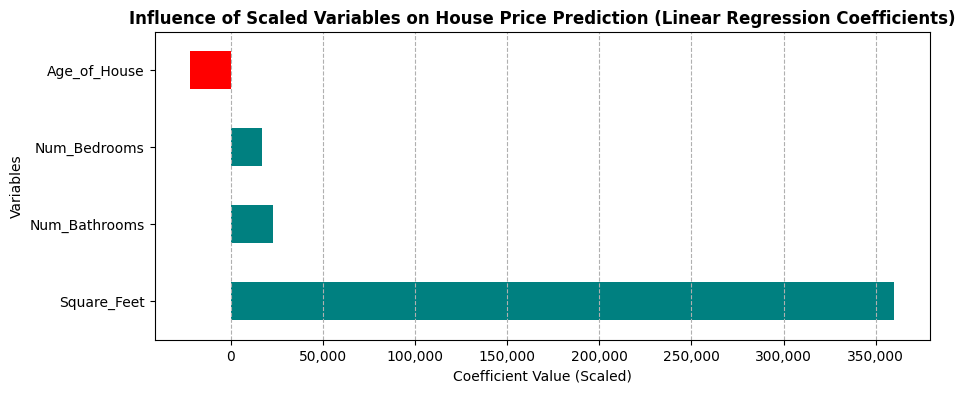


Influence of Scaled Variables on House Price Prediction (Grouped and Ranked):
Square_Feet      360053.326432
Num_Bathrooms     22947.026532
Num_Bedrooms      16756.241307
Age_of_House     -22254.446571
Name: Coef., dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker # Import for comma formatting

# Extract coefficients from the scaled linear regression model summary
results_summary_scaled = model_scaled.summary2().tables[1]
coefficients_scaled = results_summary_scaled['Coef.']

# Remove the 'const' term
if 'const' in coefficients_scaled.index:
    coefficients_scaled = coefficients_scaled.drop('const')

# Separate positive and negative coefficients
positive_coefficients_scaled = coefficients_scaled[coefficients_scaled >= 0].sort_values(ascending=False)
negative_coefficients_scaled = coefficients_scaled[coefficients_scaled < 0].sort_values(ascending=True)

# Combine the sorted positive and negative coefficients
coefficients_scaled_grouped = pd.concat([positive_coefficients_scaled, negative_coefficients_scaled])

# Create a bar plot, colored by positive/negative influence
plt.figure(figsize=(10, 4))
ax = coefficients_scaled_grouped.plot(kind='barh', color=['teal' if coef >= 0 else 'red' for coef in coefficients_scaled_grouped.values])


plt.title('Influence of Scaled Variables on House Price Prediction (Linear Regression Coefficients)', fontweight='bold')
plt.xlabel('Coefficient Value (Scaled)')
plt.ylabel('Variables')
plt.grid(axis='x', linestyle='--')

# Apply comma formatting to the x-axis - Note: Scaled coefficients are smaller, comma might not be ideal
# Keeping for consistency with user request, but might consider removing if values are too small.
formatter = mticker.FuncFormatter(lambda x, _: f'{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)


plt.show()

print("\nInfluence of Scaled Variables on House Price Prediction (Grouped and Ranked):")
print(coefficients_scaled_grouped)

**Activity 3. Analyzing the Model using R-Squared and RMSE**

*Now, using the original regression model since we have validated through VIF that there is no multicollinearity amongs the variables.

In [ ]:
import numpy as np

# Extract R-squared from the housing price model summary
r_squared_housing = model.rsquared

# Calculate residuals for the housing price model
residuals_housing = model.resid

# Calculate Mean Squared Error (MSE) for the housing price model
mse_housing = np.mean(residuals_housing**2)

# Calculate Root Mean Squared Error (RMSE) for the housing price model
rmse_housing = np.sqrt(mse_housing)

print(f"Housing Price Model R-squared: {r_squared_housing:.4f}")
print(f"Housing Price Model RMSE: {rmse_housing:.2f}")

Housing Price Model R-squared: 0.7263
Housing Price Model RMSE: 221872.51


**Analyze the R-squared:**
1. R-squared --> the value is 0.726 or 72.6%. It means that about 72.6% of the variation in the house prices can be explained by the given variables or model predictors (i.e., Square Feet, Bedrooms, Bathrooms, Age).

Implication: This is a strong R-squared in real estate modeling. It means that size, rooms, and age explains most, if not all, of house price differences. The remaining 27.4% variation could be explained by other factors (e.g., location, lot size, neighborhood quality, market trends, etc.)



**Analyze the RMSE:**

2. RMSE --> the value is 221,872.51 or Php221,872.51. It means that the model's average prediction error is about Php221,872.51 in house prices.

Implication: It means that if the house price prediction is Php10,000,000, it could be off by Php221,873 which is around 2.22% This could be high if the house price prediction is lower (i.e., Php1,000,000 where error is about 22.19%).

However, let's run the mean of the house prices to further understand the RMSE of the model.

In [ ]:
# Calculate and print the mean of House_Price
# Use the dedicated housing_df DataFrame
mean_house_price = housing_df['House_Price'].mean()
print(f"Mean House Price: {mean_house_price:,.2f}")

Mean House Price: 984,161.45


Let's calculate the normalized RMSE using the mean house price:

nRMSE = RMSE / mean (house price) x 100

nRMSE = 221,872.51 / 984,161.45 x 100

nRMSE = 22.54%

Result: The model has an error margin of about 22.5% relative to average house prices.

Interpretation: Prediction is quite high relative to the mean house price. This means that the individual prediction has a big margin of error. This could also mean that the dataset has a wide variation of house prices so the model struggles to generalize.

Let's validate to see the variation of house prices using histogram (objective, to see if there are zero and non-positive values in the house price):



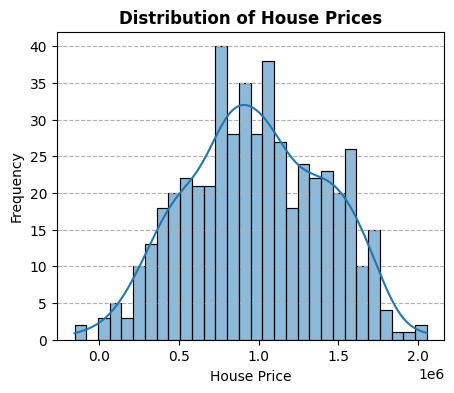

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of House_Price using a histogram
plt.figure(figsize=(5, 4))
sns.histplot(housing_df['House_Price'], bins=30, kde=True) # Adjust bins as needed
plt.title('Distribution of House Prices', fontweight='bold')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

As validated, there appears zero and non-positive values in the house prices. One way to address this is by replacing these by the 'mean'.

In [ ]:
import numpy as np
import statsmodels.api as sm

# Calculate the mean of positive House_Price values
mean_positive_house_price = housing_df[housing_df['House_Price'] > 0]['House_Price'].mean()

# Replace zero and non-positive House_Price values with the mean of positive values
housing_df['House_Price_Cleaned'] = housing_df['House_Price'].apply(lambda x: mean_positive_house_price if x <= 0 else x)

# Perform log transformation on the cleaned House_Price
housing_df['Log_House_Price'] = np.log(housing_df['House_Price_Cleaned'])

# Define the dependent variable (y) as the log-transformed House_Price
y_log = housing_df['Log_House_Price']

# Define the independent variables (x) - using the same as the original model
x = housing_df[['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Age_of_House']]

# Add a constant to the independent variables for the intercept
x = sm.add_constant(x)

# Create and fit the regression model with the log-transformed dependent variable
model_log = sm.OLS(y_log, x).fit()

# Print the regression summary
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:        Log_House_Price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     125.3
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           8.40e-74
Time:                        08:21:30   Log-Likelihood:                -317.50
No. Observations:                 500   AIC:                             645.0
Df Residuals:                     495   BIC:                             666.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4279      0.091    136.262

Here is the histogram of house prices after the log-transformation

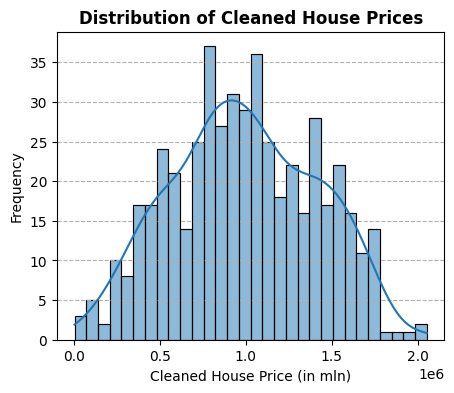

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the cleaned House_Price using a histogram
plt.figure(figsize=(5, 4))
sns.histplot(housing_df['House_Price_Cleaned'], bins=30, kde=True) # Adjust bins as needed
plt.title('Distribution of Cleaned House Prices', fontweight='bold')
plt.xlabel('Cleaned House Price (in mln)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
import numpy as np

# Extract R-squared from the log-transformed model summary
r_squared_log = model_log.rsquared

# Calculate residuals for the log-transformed model
residuals_log = model_log.resid

# Calculate Mean Squared Error (MSE) for the log-transformed model
mse_log = np.mean(residuals_log**2)

# Calculate Root Mean Squared Error (RMSE) for the log-transformed model
rmse_log = np.sqrt(mse_log)

print(f"Log-Transformed Model R-squared: {r_squared_log:.4f}")
print(f"Log-Transformed Model RMSE: {rmse_log:.4f}") # Using .4f for consistency with log scale

Log-Transformed Model R-squared: 0.5031
Log-Transformed Model RMSE: 0.4566


Interpretation of the results:

1. R-squared drop from 0.726 to 0.5031 --> after log-transform, the model explains 50.31% of the variation in house prices. Log-transformation compresses large values, reducing the dominance of luxury/outlier properties. The model now balances fit across small and large houses, so the explanatory power drops but becomes more stable.

2. RMSE 0.4566 in log scale --> this means that the average prediction error is (0.4566) or 1.58. On average, this means that predictions are within. a factor of around 1.6 of the actual price. This is a more interpretable for relative errors rather than absolute peso erros (i.e., original regression).

To address the lower r-squared and RMSE, here are the things we can do since the original model only has few variables which can only exlpain 50% (after log-transformation) of the variations in house prices:

1. Add more explanatory variables like neighborhood or location dummary variables
2. Proximity to critical establishments like schools, banks, transport or malls
3. Lot size
4. Condition score of the house
5. Amenities
6. Crime rate, flood risk, air quality


**Activity 4. Answering the assignment questions:**

**1. Why is the coefficient for Square_Feet significantly positive?**

The coefficient of 304.34 means that, on average, each additional square foot increases the house price by about $304, holding other factors constant.

Reason: Square footage is one of the strongest indicators of home value because:

* Bigger houses generally require more building materials, land, and labor → higher cost.
* Larger homes often provide more living space and functionality → higher demand in the housing market.
* Buyers use square footage as a key benchmark for price comparisons, so real estate markets naturally price homes by size.

This explains why the relationship is strong and highly significant (p < 0.001).

**2. Residual Plot for Square Feet**

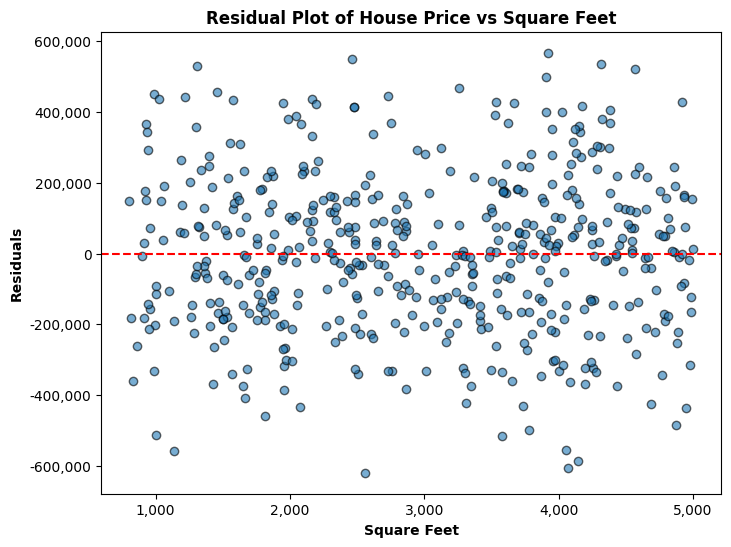

In [ ]:
# Calculate the residuals
residuals = model.resid

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, _: f"{x:,.0f}")

# Plot residuals against Square_Feet
plt.figure(figsize=(8, 6))
plt.scatter(housing_df['Square_Feet'], residuals, alpha=0.6, edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--')
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('Square Feet', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.title('Residual Plot of House Price vs Square Feet', fontweight='bold')
plt.show()


RULE:

Interpretation of the Residual Plot:
A good residual plot for a linear model should show residuals randomly scattered around zero.
If there is a pattern in the residuals (e.g., a curve), it suggests that the linear model is not appropriate and there might be non-linearity.


ANSWER:

Based on the plot above:
- The residuals are scattered randomly around the horizontal line at zero, it indicates that the linearity assumption holds for the relationship between House_Price and Square_Feet.
- Moreover, it appears that there is no discernible pattern (e.g., a curved shape or fanning out), and therefore suggests no non-linearity or heteroscedasticity (non-constant variance of residuals).

**2(a) Verify randomness of residuals using *LOWESS* smoothing line**

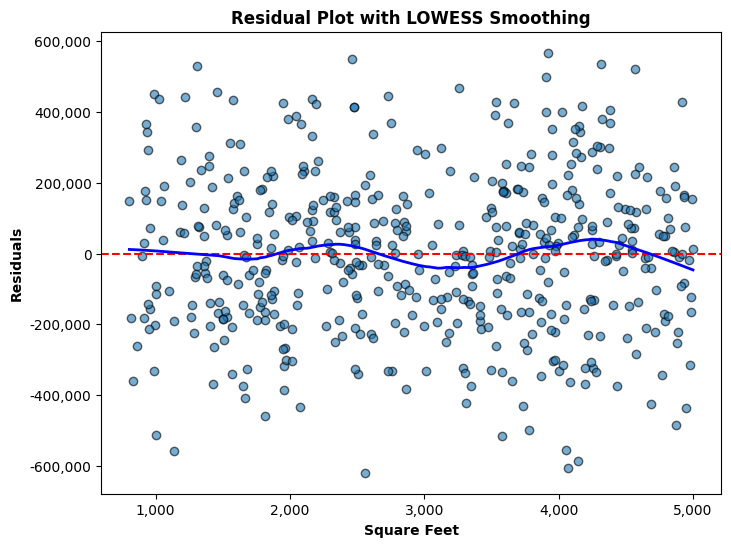

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming 'residuals' and 'model' are defined from a previous cell
# If not, you may need to re-run the regression analysis cell first (e.g., cell 'HiX5ipvwbUFU')
# Calculate the residuals if not already available
# residuals = model.resid

formatter = FuncFormatter(lambda x, _: f"{x:,.0f}")


plt.figure(figsize=(8, 6))
# Assuming 'housing_df' is loaded and contains 'Square_Feet'
plt.scatter(housing_df['Square_Feet'], residuals, alpha=0.6, edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--')

# LOWESS smoothing line
lowess = sm.nonparametric.lowess(residuals, housing_df['Square_Feet'], frac=0.3)
plt.plot(lowess[:, 0], lowess[:, 1], color='blue', linewidth=2)

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('Square Feet', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.title('Residual Plot with LOWESS Smoothing', fontweight='bold')
plt.show()

RULE:
* If the blue line stays close to y=0 without clear curves → linearity assumption holds.
* If it bends significantly → possible non-linearity.


ANSWER:

As the diagram shows, the blue line stays close to y=0. Our linearity assumption (i.e., Square_Feet and House_Prices) holds.

**2(b) Perform *RAMSEY Test* to detect non-linearity**

In [ ]:
from statsmodels.stats.diagnostic import linear_reset

reset_test = linear_reset(model, power=2, use_f=True)
print(reset_test)

<F test: F=0.003355246764873187, p=0.9538321965188775, df_denom=494, df_num=1>


RULE:

* p-value > 0.05 → no evidence of non-linearity.
* p-value < 0.05 → non-linear patterns may exist.

ANSWER: As the p-value is 0.9538 (>0.05), non-linearity is not evident.

**OVERALL:** The residual test, as supplemented by Lowess Smoothing and Ramset Test to detect non-linearity, has shown that there is a strong linear relationship between Square_Feet and House_Price, and there is no evidence of non-linear relationship with the residuals vis-a-vis House_Price.


**ADDRESSING NON-LINEARITY:**
Assuming, however, that there is a non-linear relationships in the residual plot, these can be addressed with the following approaches:

1. Transformations: Apply log transformation (log(House_Price) or (log(Square_Feet)).

2. Plynomial terms: Add Square_Feet2 to capture curvature.

3. Piecewise regression / splines: Allow different slopes for different ranges of square footage.

4. Check interactions: Square footage might interact with number of bedrooms/bathrooms.

# **Task 2. Employee Attrition**

Note to Reviewer: File "hr_dataset.csv" was uploaded to this Jupiter Notebook using Google Colab, uploaded from my Downloads Folder.

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for filename in uploaded.keys():
  hr_df = pd.read_csv(filename)
  print(f"DataFrame from {filename}:")
  print(hr_df.head())

Saving hr_dataset.csv to hr_dataset (1).csv
DataFrame from hr_dataset (1).csv:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7

In [ ]:
print(hr_df.tail)

<bound method NDFrame.tail of      Age Attrition     BusinessTravel  DailyRate              Department  \
0     41       Yes      Travel_Rarely       1102                   Sales   
1     49        No  Travel_Frequently        279  Research & Development   
2     37       Yes      Travel_Rarely       1373  Research & Development   
3     33        No  Travel_Frequently       1392  Research & Development   
4     27        No      Travel_Rarely        591  Research & Development   
..   ...       ...                ...        ...                     ...   
912   36        No  Travel_Frequently        884  Research & Development   
913   39        No      Travel_Rarely        613  Research & Development   
914   27        No      Travel_Rarely        155  Research & Development   
915   49        No  Travel_Frequently       1023                   Sales   
916   34        No      Travel_Rarely        628  Research & Development   

     DistanceFromHome  Education EducationField  Employee

In [ ]:
print(hr_df.shape)

(917, 35)


In [ ]:
print(hr_df.info())

# Identify and print columns with 'object' dtype
object_cols = df.select_dtypes(include=['object']).columns
print("\nObject type columns that may need conversion or encoding:")
print(object_cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       917 non-null    int64 
 1   Attrition                 917 non-null    object
 2   BusinessTravel            917 non-null    object
 3   DailyRate                 917 non-null    int64 
 4   Department                917 non-null    object
 5   DistanceFromHome          917 non-null    int64 
 6   Education                 917 non-null    int64 
 7   EducationField            917 non-null    object
 8   EmployeeCount             917 non-null    int64 
 9   EmployeeNumber            917 non-null    int64 
 10  EnvironmentSatisfaction   917 non-null    int64 
 11  Gender                    917 non-null    object
 12  HourlyRate                917 non-null    int64 
 13  JobInvolvement            917 non-null    int64 
 14  JobLevel                  

**Running a Logistic Regression (before data processing) --> to show the possible errors and initial observations**

**Data processing**

1. *Based on data information, there are variables that need conversion to effectively use Logistic Regression. The D-types will be converted from 'object' to 'integer'.*

Here is a more detailed explanation:

Based on the `df.info()` output, the columns with `object` data types are typically the ones that need conversion or encoding for use as independent variables in a logistic regression model. These are:

*   `BusinessTravel`
*   `Department`
*   `EducationField`
*   `Gender`
*   `JobRole`
*   `MaritalStatus`
*   `Over18`
*   `OverTime`

For the logistic regression, we will  convert or encode the other 'object' type columns listed above to a numeric format. One-hot encoding is a common method for this, where each category in a column (like 'Travel_Rarely', 'Travel_Frequently' in 'BusinessTravel') is turned into a separate binary (0 or 1) column.

2. *We will exclude 'EmployeeCount', 'StandardHours', and 'EmployeeNumber' from the independent variables as they are constant or identifiers and typically don't contribute to predicting attrition. 'Over18' might is also constant and will be excluded.*

In [ ]:
import statsmodels.api as sm
import pandas as pd
from google.colab import files # Import files for loading

# Load the hr_dataset.csv into a dedicated DataFrame
try:
    hr_df = pd.read_csv('hr_dataset.csv')
    print("Loaded hr_dataset.csv into hr_df.")
except FileNotFoundError:
    print("Error: hr_dataset.csv not found. Please upload the file.")
    # You might want to exit or handle this error further
    # For now, we'll continue, but the code will likely fail later without the data

# Convert 'Attrition' to numeric (0 for No, 1 for Yes)
hr_df['Attrition_numeric'] = hr_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select the dependent variable (y)
y = hr_df['Attrition_numeric']

# Select independent variables - include all columns except Attrition, Attrition_numeric, and identifiers/constant columns
independent_variables = hr_df.drop(['Attrition', 'Attrition_numeric', 'EmployeeCount', 'StandardHours', 'EmployeeNumber'], axis=1, errors='ignore') # Removed 'Over18' and added errors='ignore'

# Select categorical columns for one-hot encoding (all remaining object type columns)
categorical_cols = independent_variables.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
independent_variables_encoded = pd.get_dummies(independent_variables, columns=categorical_cols, drop_first=True)

# Ensure all columns are numeric (get_dummies creates integers/booleans, numeric columns are already numbers)
# Convert boolean columns created by get_dummies to integers
for col in independent_variables_encoded.select_dtypes(include=['bool']).columns:
    independent_variables_encoded[col] = independent_variables_encoded[col].astype(int)


# Define the independent variables (X) for the model
X = independent_variables_encoded

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Create and fit the logistic regression model
model_logistic = sm.Logit(y, X).fit()

# Print the regression summary
print(model_logistic.summary())

Loaded hr_dataset.csv into hr_df.
         Current function value: 0.309501
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:      Attrition_numeric   No. Observations:                  917
Model:                          Logit   Df Residuals:                      872
Method:                           MLE   Df Model:                           44
Date:                Tue, 30 Sep 2025   Pseudo R-squ.:                  0.3162
Time:                        08:27:09   Log-Likelihood:                -283.81
converged:                      False   LL-Null:                       -415.04
Covariance Type:            nonrobust   LLR p-value:                 7.161e-33
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -21.1737   1.27e+05     -0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Logistic Regression observation:

There are unproportionally high std err for the following variables, suggesting unvertainty in the coefficient estimates:

* Monthly rate
* Department_Research & Development
* Department_Sales
* JobRole_Human Resources

A large std error relative to the coefficient means that the estimate is unstable and less reliable.

Therefore, this will be removed from the analysis as these disrupt the true impact of the other variables to attrition.

**-- Visualization using Matplotlib (high std error not removed) --**

*Attempt #1 *

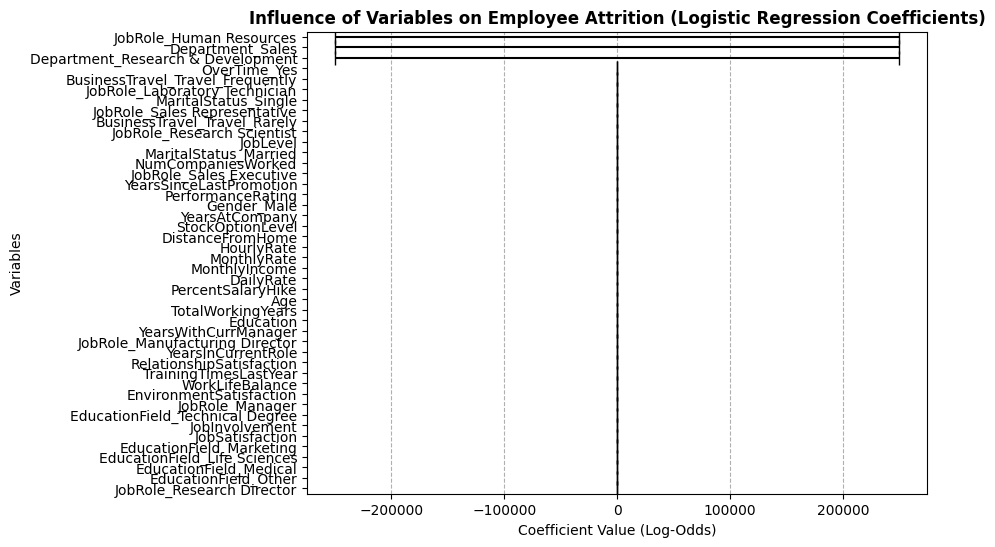

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract coefficients and confidence intervals from the logistic regression model summary
results_summary = model_logistic.summary2().tables[1]
coefficients = results_summary['Coef.']
conf_int = results_summary[['[0.025', '0.975]']]

# Calculate error bars
errors = conf_int['0.975]'] - coefficients

# Sort coefficients by their value to show positive and negative influences
coefficients_sorted = coefficients.sort_values(ascending=True)
coefficients = coefficients[coefficients_sorted.index]
errors = errors[coefficients_sorted.index]

# Remove the 'const' term for visualization
coefficients = coefficients.drop('const')
errors = errors.drop('const')

# Create a bar plot with error bars
plt.figure(figsize=(8, 6))
coefficients.plot(kind='barh', xerr=errors, capsize=5)
plt.title('Influence of Variables on Employee Attrition (Logistic Regression Coefficients)', fontweight='bold')
plt.xlabel('Coefficient Value (Log-Odds)')
plt.ylabel('Variables')
plt.grid(axis='x', linestyle='--')
plt.show()

**Re-running a logistic regression after the high std error variables have been removed.**

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Convert 'Attrition' to numeric (0 for No, 1 for Yes)
hr_df['Attrition_numeric'] = hr_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select the dependent variable (y)
y = hr_df['Attrition_numeric']

# Select independent variables - include all columns except Attrition, Attrition_numeric, and identifiers/constant columns
independent_variables = hr_df.drop(['Attrition', 'Attrition_numeric', 'EmployeeCount', 'StandardHours', 'EmployeeNumber'], axis=1)

# Select categorical columns for one-hot encoding (all remaining object type columns)
categorical_cols = independent_variables.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
independent_variables_encoded = pd.get_dummies(independent_variables, columns=categorical_cols, drop_first=True)

# Convert boolean columns created by get_dummies to integers
for col in independent_variables_encoded.select_dtypes(include=['bool']).columns:
    independent_variables_encoded[col] = independent_variables_encoded[col].astype(int)

# Define variables to exclude based on high standard errors
variables_to_exclude = [
    'MonthlyRate',
    'Department_Research & Development',
    'Department_Sales',
    'JobRole_Human Resources'
]

# Drop the specified variables from the independent variables DataFrame
X = independent_variables_encoded.drop(variables_to_exclude, axis=1, errors='ignore') # Use errors='ignore' in case a column wasn't created by one-hot encoding


# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Create and fit the logistic regression model
model_logistic_refined = sm.Logit(y, X).fit()

# Print the regression summary
print(model_logistic_refined.summary())

Optimization terminated successfully.
         Current function value: 0.311302
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:      Attrition_numeric   No. Observations:                  917
Model:                          Logit   Df Residuals:                      876
Method:                           MLE   Df Model:                           40
Date:                Tue, 30 Sep 2025   Pseudo R-squ.:                  0.3122
Time:                        08:28:21   Log-Likelihood:                -285.46
converged:                       True   LL-Null:                       -415.04
Covariance Type:            nonrobust   LLR p-value:                 7.048e-34
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                1.8149      1.752      1.03

**-- Visualization using Matplotlib to show the influence of the variables to Attrition --**

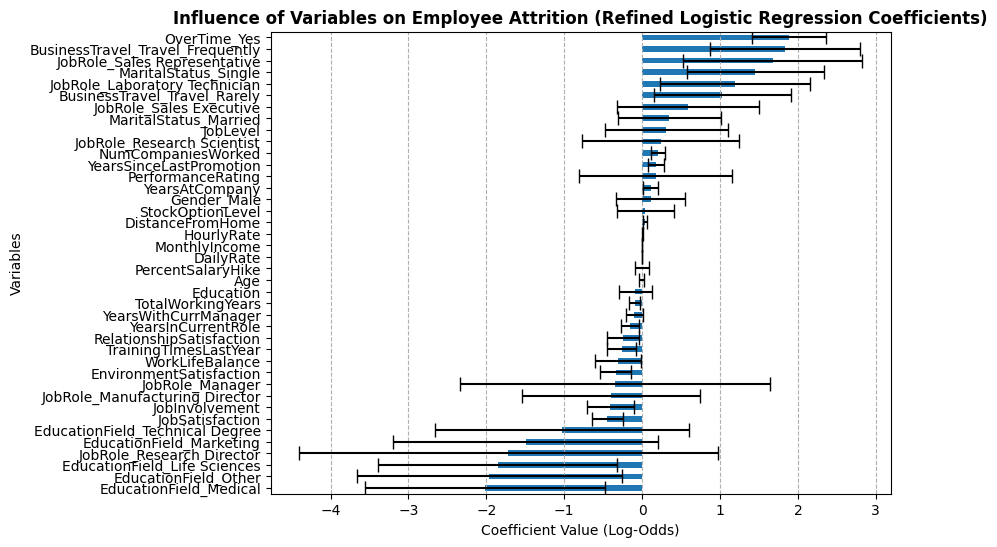

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract coefficients and confidence intervals from the refined logistic regression model summary
results_summary_refined = model_logistic_refined.summary2().tables[1]
coefficients_refined = results_summary_refined['Coef.']
conf_int_refined = results_summary_refined[['[0.025', '0.975]']]

# Calculate error bars
errors_refined = conf_int_refined['0.975]'] - coefficients_refined

# Sort coefficients by their value to show positive and negative influences
coefficients_sorted_refined = coefficients_refined.sort_values(ascending=True)
coefficients_refined = coefficients_refined[coefficients_sorted_refined.index]
errors_refined = errors_refined[coefficients_sorted_refined.index]

# Remove the 'const' term for visualization if it exists
if 'const' in coefficients_refined.index:
    coefficients_refined = coefficients_refined.drop('const')
if 'const' in errors_refined.index:
    errors_refined = errors_refined.drop('const')


# Create a bar plot with error bars
plt.figure(figsize=(8, 6))
coefficients_refined.plot(kind='barh', xerr=errors_refined, capsize=5)
plt.title('Influence of Variables on Employee Attrition (Refined Logistic Regression Coefficients)', fontweight='bold')
plt.xlabel('Coefficient Value (Log-Odds)')
plt.ylabel('Variables')
plt.grid(axis='x', linestyle='--')
plt.show()

How to read the plot:

X-axis (Coefficient Value, Log-Odds):
* Positive → increases likelihood of attrition.
* Negative → decreases likelihood of attrition (protective).

Bars (Blue): Size of the coefficient effect.

Black lines: 95% confidence intervals → if they cross zero, the effect may not be statistically significant.


**1(a) Q: What does a positive or negative coefficient indicate for each variable?**

ANSWER: Positive coeffifient indicates that the variable (e.g., Overtime) has direct relationship with attrition. It means that when employee registers high overtime hours, the likelihood that the said employee will leave the company is also high (i.e., high attrition).

On the other hand, Negative coefficient indicates that the variable (e.g., Job Satisfaction) has inverse or indirect relationship with attrition (i.e., Yes). It means that the more the employee is satisfied with his/her job, the less likely she will resign from the company (i.e., low attrition).


Top 10 Positive Influencers on Employee Attrition:
|                                  | Coef.    |
|:---------------------------------|:---------|
| JobRole_Research Scientist       | 0.2362   |
| JobLevel                         | 0.312234 |
| MaritalStatus_Married            | 0.349771 |
| JobRole_Sales Executive          | 0.589142 |
| BusinessTravel_Travel_Rarely     | 1.03147  |
| JobRole_Laboratory Technician    | 1.19413  |
| MaritalStatus_Single             | 1.45269  |
| JobRole_Sales Representative     | 1.67514  |
| BusinessTravel_Travel_Frequently | 1.8364   |
| OverTime_Yes                     | 1.88192  |
Top 10 Negative Influencers on Employee Attrition:
|                                 | Coef.     |
|:--------------------------------|:----------|
| EducationField_Medical          | -2.01342  |
| EducationField_Other            | -1.96226  |
| EducationField_Life Sciences    | -1.85252  |
| JobRole_Research Director       | -1.71651  |
| EducationField_Marketing       

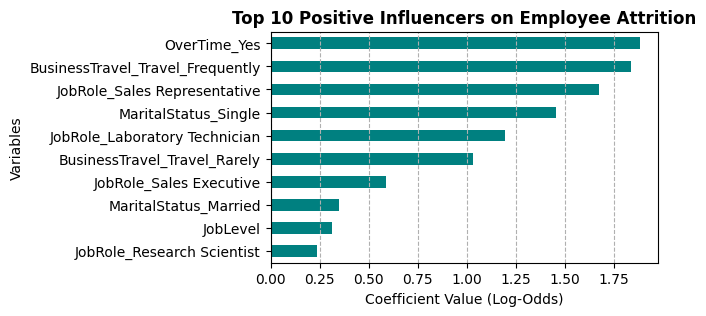

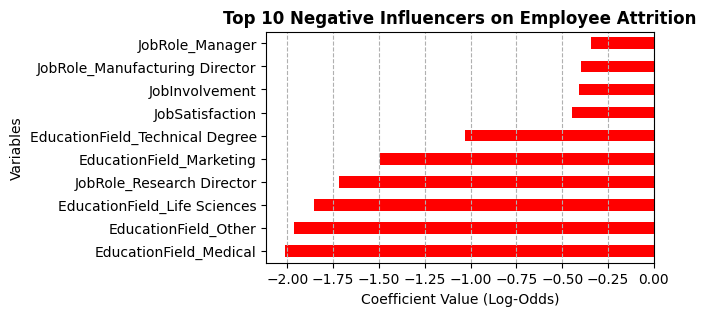


Variables with Weak or No Apparent Influence (Absolute Coefficient < 0.20):
|                         | Coef.        |
|:------------------------|:-------------|
| YearsInCurrentRole      | -0.154332    |
| YearsWithCurrManager    | -0.101742    |
| TotalWorkingYears       | -0.0943382   |
| Education               | -0.0859478   |
| Age                     | -0.00794952  |
| PercentSalaryHike       | -0.00197511  |
| DailyRate               | -0.000186011 |
| MonthlyIncome           | -5.72263e-05 |
| HourlyRate              | 0.00314357   |
| DistanceFromHome        | 0.0362273    |
| StockOptionLevel        | 0.0430907    |
| Gender_Male             | 0.110746     |
| YearsAtCompany          | 0.111039     |
| PerformanceRating       | 0.176165     |
| YearsSinceLastPromotion | 0.176409     |


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract coefficients from the refined logistic regression model summary
results_summary_refined = model_logistic_refined.summary2().tables[1]
coefficients_refined = results_summary_refined['Coef.']

# Remove the 'const' term
if 'const' in coefficients_refined.index:
    coefficients_refined = coefficients_refined.drop('const')

# Sort coefficients by value
coefficients_sorted = coefficients_refined.sort_values(ascending=True)

# Identify top 10 negative and top 10 positive influencers
top_10_positive = coefficients_sorted.tail(10)
top_10_negative = coefficients_sorted.head(10)

# Print the top 10 positive influencers as a table (keeping this as it was in the previous successful step)
print("\nTop 10 Positive Influencers on Employee Attrition:")
print(top_10_positive.to_markdown(numalign='left', stralign='left'))

# Print the top 10 negative influencers as a table (keeping this as it was in the previous successful step)
print("Top 10 Negative Influencers on Employee Attrition:")
print(top_10_negative.to_markdown(numalign='left', stralign='left'))

print()

# Create a bar plot for Top 10 Positive Influencers
plt.figure(figsize=(5, 3))
top_10_positive.plot(kind='barh', color='teal')
plt.title('Top 10 Positive Influencers on Employee Attrition', fontweight='bold')
plt.xlabel('Coefficient Value (Log-Odds)')
plt.ylabel('Variables')
plt.grid(axis='x', linestyle='--')
plt.show()

print()

# Create a bar plot for Top 10 Negative Influencers
plt.figure(figsize=(5, 3))
top_10_negative.plot(kind='barh', color='red')
plt.title('Top 10 Negative Influencers on Employee Attrition', fontweight='bold')
plt.xlabel('Coefficient Value (Log-Odds)')
plt.ylabel('Variables')
plt.grid(axis='x', linestyle='--')
plt.show()


# Identify and list variables with weak or no influence (e.g., small absolute coefficient)
# Define a threshold for weak influence (e.g., absolute coefficient less than a certain value, or based on p-values)
# For simplicity, let's consider variables with absolute coefficients less than 0.2 as potentially having weak influence,
# or you could refine this based on statistical significance (p-values > 0.05).
weak_influence_threshold = 0.2
weak_influencers = coefficients_refined[abs(coefficients_refined) < weak_influence_threshold].sort_values()

print("\nVariables with Weak or No Apparent Influence (Absolute Coefficient < {:.2f}):".format(weak_influence_threshold))
print(weak_influencers.to_markdown(numalign='left', stralign='left'))

**1(b) Which feature has the strongest influence on employee attrition?**


*The following features are **Strong Positive drivers** (higher attrition risk):*

i. Overtime -->  the biggest risk factor. Employees working overtime are more likely to leave.

ii. BusinessTravel_Frequently --> Frequent travel increases attrition risk.

iii. JobRole_Sales Representative --> Sales representatives show a strong tendency to leave.

*The following features are **Strong Negative drivers** (lower attrition risk):*

i. EducationField_Medical --> Employees with Medical educational background are least likely to leave the company, compared with the baseline education group.

ii. EducationField_Other/LifeSciences --> employees in other of lifesciences also show lower risk of attrition.

iii. EducationField_Marketing/Technical Degree --> employees with Marketing and Technical Degrees are less likely to leave the company compared with other baseline education group.

**2. Discuss the practical implications**

1. Work-life Balance --> Negative Coefficient  

Interpretation: a negative coefficient means better work-life balance reduces the likelihood of attrition.

Practical implication:
* An employee who feel their work and personal lives are well balances (or harmonized) are more likely to stay
* The HR should prioritize flexible scheduling, remote work options, wellness programs, and managable workloads
* Companies which ignore this may see rising employee turnover, especially among younger or family-oriented employees

2. Overtime --> High Positive Coefficient

Interpretation: a positive coefficient indicates more overtime increases the odds of attrition.

Practical implication:
* Consistently high overtime signals burnout, stress, and dissatisfaction
* Employees working longer hours may feel undervalued or overburdened, making them more likely to quit.
* HR (in partnership with the line managers) should monitor the overtime levels, ensure fair workload distribution, and considering compensatory time-off or support staff.
* In the long run, reducing excessive overtime helps improve both retention and productivity.

3. Salary level --> Small or Non-Significant Coefficient

Interpretation: if salary has little or no effect, it suggests that pay alone does not strongly preduct attrition.

Possible reasons:
* Salary differences across all employees may not be large enough to drive decisions
* Other factors like career growth, work relationships, recognition, or work-life balance matter more once a fair baseline pay is met
* Attrition could be more voluntary (career development) than financial (pay dissatisfaction)

Practical implication:
* While competitive pay is necessary to attract talent, retention depends on non-monetary factors like culture, career progression, and employee engagement.
* HR should not solely rely on salary increases to solve turnover issues.

# **Task 3. Predictive Analytics Using Machine Learning**

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for filename in uploaded.keys():
  EmployeeSalary_df = pd.read_csv(filename)
  print(f"DataFrame from {filename}:")
  print(EmployeeSalary_df.head())


Saving employee_salary_dataset.csv to employee_salary_dataset.csv
DataFrame from employee_salary_dataset.csv:
   Experience    Education  Age  Location               Role         Salary
0           7   Bachelor's   56  New York  Software Engineer   78856.820000
1          20  High School   28    Austin  Software Engineer   71947.203460
2          29          PhD   42   Chicago  Software Engineer  111659.840176
3          15  High School   39   Chicago  Software Engineer   70258.290207
4          11  High School   24  New York  Software Engineer   77946.277878


In [ ]:
print(EmployeeSalary_df.shape)

(1500, 6)


In [ ]:
print(EmployeeSalary_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  1500 non-null   int64  
 1   Education   1500 non-null   object 
 2   Age         1500 non-null   int64  
 3   Location    1500 non-null   object 
 4   Role        1500 non-null   object 
 5   Salary      1500 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 70.4+ KB
None


In [ ]:
print(EmployeeSalary_df.tail())

      Experience    Education  Age       Location            Role  \
1495          22  High School   22         Austin         Manager   
1496          24   Bachelor's   53       New York         Manager   
1497          25  High School   46        Chicago  Data Scientist   
1498           7   Bachelor's   50  San Francisco              HR   
1499          20          PhD   28        Chicago  Data Scientist   

             Salary  
1495  110393.086701  
1496  127952.745583  
1497  104719.242740  
1498   82164.368752  
1499  111085.886274  


**Note on Model Choice:**

Based on the dataset, the 'Salary' column is a continuous numeric variable. Logistic regression is used for predicting binary categorical outcomes. Therefore, linear regression is a more appropriate choice for predicting 'Salary'. We will proceed with a linear regression model.

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Define the dependent variable (y)
y = EmployeeSalary_df ['Salary']

# Select independent variables - all columns except 'Salary'
independent_variables = EmployeeSalary_df.drop('Salary', axis=1)

# Select categorical columns for one-hot encoding
categorical_cols = independent_variables.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
independent_variables_encoded = pd.get_dummies(independent_variables, columns=categorical_cols, drop_first=True)

# Ensure all columns are numeric (get_dummies creates integers/booleans, numeric columns are already numbers)
# Convert boolean columns created by get_dummies to integers
for col in independent_variables_encoded.select_dtypes(include=['bool']).columns:
    independent_variables_encoded[col] = independent_variables_encoded[col].astype(int)

# Define the independent variables (X) for the model
X = independent_variables_encoded

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Create and fit the linear regression model
model_salary = sm.OLS(y, X).fit()

# Print the regression summary
print(model_salary.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     390.9
Date:                Wed, 01 Oct 2025   Prob (F-statistic):               0.00
Time:                        03:53:17   Log-Likelihood:                -16157.
No. Observations:                1500   AIC:                         3.234e+04
Df Residuals:                    1488   BIC:                         3.240e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5.39

In [ ]:
import numpy as np

# Extract R-squared from the salary model summary
r_squared_salary = model_salary.rsquared

# Calculate residuals for the salary model
residuals_salary = model_salary.resid

# Calculate Mean Squared Error (MSE) for the salary model
mse_salary = np.mean(residuals_salary**2)

# Calculate Root Mean Squared Error (RMSE) for the salary model
rmse_salary = np.sqrt(mse_salary)

print(f"Employee Salary Model R-squared: {r_squared_salary:.4f}")
print(f"Employee Salary Model RMSE: {rmse_salary:.2f}")

Employee Salary Model R-squared: 0.7429
Employee Salary Model RMSE: 11528.57


**Analyzing using R-squared and RMSE:**

R-squared: 0.7429 or 74.29%. This means that the model explains 74.3% in the variation in salaries. This is a strong predictor of salary for HR/compensation data.

RMSE: Php11,528.57. On average, predicted salaries deviate from actual salaries by around Php11.5k.

f-statistic significant: (p<0.001). This means that the model is statistically valid.


**Interpretation of the regression model:**

a. On feature infulence (in general):

* Positive coefficient → means that as the variable increases (or the condition is true), salary increases, holding all else constant.
* Negative coefficient → means that as the variable increases (or the condition is true), salary decreases, holding all else constant.

b. On the results of the regression model:

* Experience (+Php1,994/year) - more years of experience consistently inceases salary
* Age (+Php115/year) - slightly positive influence, but weaker than experience
* Education - For High School (+Php3,757), lower salary compared to bachelor's. For Master's (+Php5,004), higher salary compared to bachelor's. For PHD (+Php10,850), higher salary compared to bachelor's.
* Location - Chicago (+Php1,944), New York (+Php5,840), San Francisco (+Php10,150),  all add premiums relative to the baseline city
* Role - HR (-Php11,290), negative impact. Manager (+Php4,811), positive impact. Software Engineer (-Php5,895), negative compared to baseline role.

c. Strongest Influence: Numerically, PhD (+Php10,850) and location of San Francisco (+Php10,150) have the largest positive effects, while HR (+Php-11,290) has the strongest negative impact effect. This makes role and education the strongest influenceers overall.  

**Practical implications:**

1. Experience (positive coefficient)
    * Implies that every additional year of work increases salary by about ₱2,000.
    * Practical meaning: Employers reward accumulated experience as a proxy for skill, tenure, and productivity
  
2.	Location (significant coefficients)
	* Salaries are higher in expensive, competitive labor markets like New York and San Francisco.
	* Practical meaning: Companies adjust pay to reflect cost of living, market wage benchmarks, and talent scarcity in those regions.

3.	Education (considering p-values)
	* In this model, all education coefficients are highly significant (p < 0.001), meaning education level strongly impacts salary.
	* But if education had a high p-value (not significant), it would suggest that education does not provide additional explanatory power for salary once other factors (like experience and role) are controlled. This could happen if the labor market rewards skills and roles more than formal degrees.

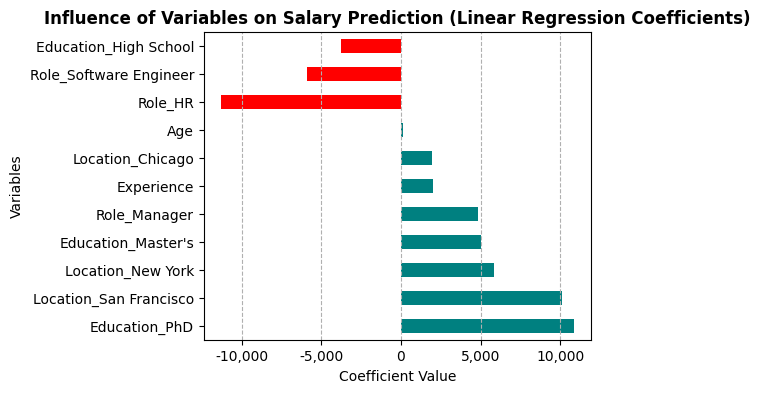


Influence of Variables on Salary Prediction (Grouped and Ranked):
Education_PhD             10853.908245
Location_San Francisco    10151.691594
Location_New York          5839.691704
Education_Master's         5004.303899
Role_Manager               4811.378870
Experience                 1994.773744
Location_Chicago           1944.004152
Age                         115.201834
Role_HR                  -11289.682183
Role_Software Engineer    -5894.519183
Education_High School     -3757.062761
Name: Coef., dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker # Import for comma formatting

# Extract coefficients from the linear regression model summary
results_summary_salary = model_salary.summary2().tables[1]
coefficients_salary = results_summary_salary['Coef.']

# Remove the 'const' term
if 'const' in coefficients_salary.index:
    coefficients_salary = coefficients_salary.drop('const')

# Separate positive and negative coefficients
positive_coefficients = coefficients_salary[coefficients_salary >= 0].sort_values(ascending=False)
negative_coefficients = coefficients_salary[coefficients_salary < 0].sort_values(ascending=True)

# Combine the sorted positive and negative coefficients
coefficients_salary_grouped = pd.concat([positive_coefficients, negative_coefficients])

# Create a bar plot, colored by positive/negative influence
plt.figure(figsize=(5, 4))
ax = coefficients_salary_grouped.plot(kind='barh', color=['teal' if coef >= 0 else 'red' for coef in coefficients_salary_grouped.values]) # Updated colors


plt.title('Influence of Variables on Salary Prediction (Linear Regression Coefficients)', fontweight='bold')
plt.xlabel('Coefficient Value')
plt.ylabel('Variables')
plt.grid(axis='x', linestyle='--')

# Apply comma formatting to the x-axis
formatter = mticker.FuncFormatter(lambda x, _: f'{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)


plt.show()

print("\nInfluence of Variables on Salary Prediction (Grouped and Ranked):")
print(coefficients_salary_grouped)

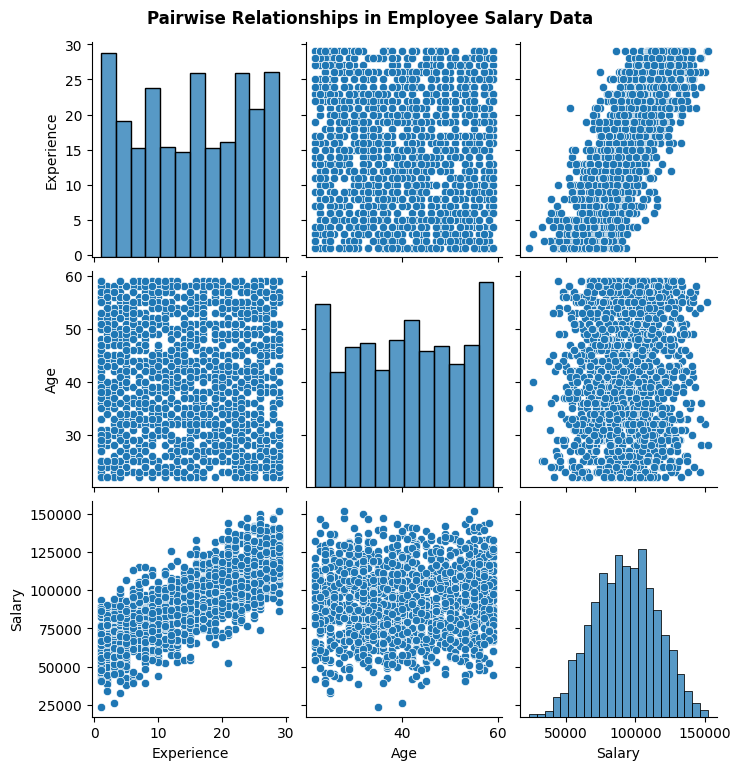

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pair plot for the EmployeeSalary_df
sns.pairplot(EmployeeSalary_df)
plt.suptitle('Pairwise Relationships in Employee Salary Data', y=1.02, fontweight='bold')
plt.show()

Additional observations:

* Typically, salary tends to increase with experience
* Experience is varied
* Age is varied
* Salary mean is Php92,787.73.

--End--